In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Tutorial 

## Aim

Scripts to compute and analyse the R-factor of the RUSLE-equation. The
R-factor is a measure for the total erosivity of a number of rainfall events
within a defined timeframe (year, month, number of days). The factor is
computed by calculating the yearly sum of -for every rainfall event- the sum
of the depth of rainfall (mm) and the kinetic energy, and taking the mean
over all years. For the formula's, we refer to the [CN-WS Pascal model documentation](https://docs.fluves.net/cnws-pascal/watem-sedem.html#rusle-factors)

## Imports
Main imports

In [54]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Package imports

In [16]:
from rfactor.process import load_rain_folder, compute_rainfall_statistics, get_rfactor_station_year
from rfactor.rfactor import compute_erosivity

Working directory

In [5]:
cwd = Path().resolve()

**Set folders**  
The input files are defined by text files (extension: .txt) that hold non-zero rainfall timeseries. The data are split per station and per year with a specific datafile tag:  

KMI_6414_2004.txt  
KMI_6414_2005.txt  
...  
KMI_6434_2003.txt  
KMI_6434_2004.txt  
...  

In [6]:
fmap_rainfall=  Path(r"\\noordzee.\fluves\projecten\FL_P_2020_DepO_CNWSMod_1\01_data\rfactor\test_rainfalldata")
fmap_erosivity = Path(r"../../tests/data/test_erosivitydata")
fmap_results = Path.cwd() / "results"

In [7]:
fmap_results

WindowsPath('C:/Users/SachaGobeyn/GitHub/rfactor/docs/notebooks/results')

## Input data and compute erosivity

**Rainfall**  
An overview of the present datafiles for the analysis is saved in a  `files.csv` file (example in *./tests/data*). This file can be used to remove specific files from the analysis (column `consider`):

   | source        | datafile      | consider  |
  | ------------- |:-------------:| ---------:|
  | KMI	          | KMI_6414_2004 | 0         |
  | KMI	          | KMI_6414_2005 | 1         |
  | KMI	          | KMI_6414_2006 | 1         |
  | ...           | ...           | ...       |


In [8]:
all_rainfall = load_rain_folder(fmap_rainfall)

100%|████████████████████████████████████████████████████████████████████████████████| 872/872 [00:19<00:00, 44.57it/s]


**Compute rainfall statistics** (and add station metadata)

In [36]:
stations=pd.read_csv("data/belgium/stations.csv")
compute_rainfall_statistics(all_rainfall,stations)

,year,location,x,y,records,min,median,max
0,"[2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...",Beitem,62433.0,177770.0,54614,0.01,0.10,21.40
1,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",Zeebrugge,68311.0,227035.0,27054,0.01,0.06,12.90
2,"[2013, 2014, 2015, 2016, 2017, 2018]",Zelzate,110942.0,207931.0,16998,0.01,0.20,16.00
3,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",Melle,111863.0,185117.0,55563,0.01,0.10,16.60
4,"[2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...",Sint-Katelijne-Waver,161253.0,195183.0,38714,0.01,0.10,15.30
5,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",Ukkel,149377.0,165077.0,59188,0.01,0.10,21.00
6,"[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",Dourbes,166282.0,87083.0,71882,0.01,0.10,16.00
7,"[2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...",Ernage,172864.0,141211.0,67030,0.01,0.10,21.19
8,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]",Retie,196134.0,212533.0,27586,0.01,0.10,17.60
9,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",Humain,213458.0,98067.0,64535,0.01,0.10,16.77


**Select stations to compute erosivity for**

In [10]:
consider_stations = pd.read_csv("../../tests/data/files_tests.csv")
sel_rainfall = all_rainfall.loc[all_rainfall["tag"].isin(consider_stations["datafile"])]

In [11]:
sel_rainfall

,minutes_since,rain_mm,datetime,station,year,tag
0,0,0.10,2008-01-01 00:00:00,KMI_6414,2008,KMI_6414_2008
1,20,0.60,2007-01-01 00:20:00,KMI_6414,2007,KMI_6414_2007
2,40,0.04,2018-01-01 00:40:00,KMI_6414,2018,KMI_6414_2018
3,50,0.04,2018-01-01 00:50:00,KMI_6414,2018,KMI_6414_2018
4,60,0.10,2013-01-01 01:00:00,KMI_6414,2013,KMI_6414_2013
...,...,...,...,...,...,...
2949007,526990,0.11,2012-12-31 23:10:00,P11_043,2012,P11_043_2012
2949008,527000,0.16,2012-12-31 23:20:00,P11_043,2012,P11_043_2012
2949009,527010,0.11,2012-12-31 23:30:00,P11_043,2012,P11_043_2012
2949010,527020,0.09,2012-12-31 23:40:00,P11_043,2012,P11_043_2012


**Run Model**  
The current implemenation makes use of a Matlab engine, which requires Matlab to be installed. Future versions of this package will use Python. Results are 
written to the *./src/rfactor/results*-folder.

In [82]:
erosivity = compute_erosivity(sel_rainfall)

In [84]:
erosivity.index

DatetimeIndex(['2004-01-07 12:30:00', '2004-01-08 11:30:00',
               '2004-01-11 05:40:00', '2004-01-11 19:30:00',
               '2004-01-12 08:40:00', '2004-01-13 01:40:00',
               '2004-01-14 10:30:00', '2004-01-15 22:40:00',
               '2004-01-19 11:30:00', '2004-01-22 18:20:00',
               ...
               '2020-11-30 16:40:00', '2020-12-07 01:40:00',
               '2020-12-11 12:40:00', '2020-12-12 20:20:00',
               '2020-12-14 07:10:00', '2020-12-14 18:50:00',
               '2020-12-21 10:20:00', '2020-12-22 15:30:00',
               '2020-12-27 08:30:00', '2020-12-30 21:30:00'],
              dtype='datetime64[ns]', name='datetime', length=88707, freq=None)

## Analysis (yearly resolution)
**Ukkel**  
Compute R-value for specific years for Ukkel (KMI_6447 and KMI_F3)

In [21]:
timeseries = [range(1898,2003,1),
              range(2003,2021,1),
              range(1898,2021,1),
              range(1996,2021,1),
              range(1991,2021,1),
              range(1990,2001,1),
              range(2000,2021,1)]
for i in timeseries:
    rfactor = get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], i)
    print(rfactor["erosivity_cum"].mean())

1010.4878442778921
1334.1705707612148
1057.8560481535
1293.553196888011
1285.879767834973
1121.1549187789467
1329.0294975567663


**Make figure for Ukkel**

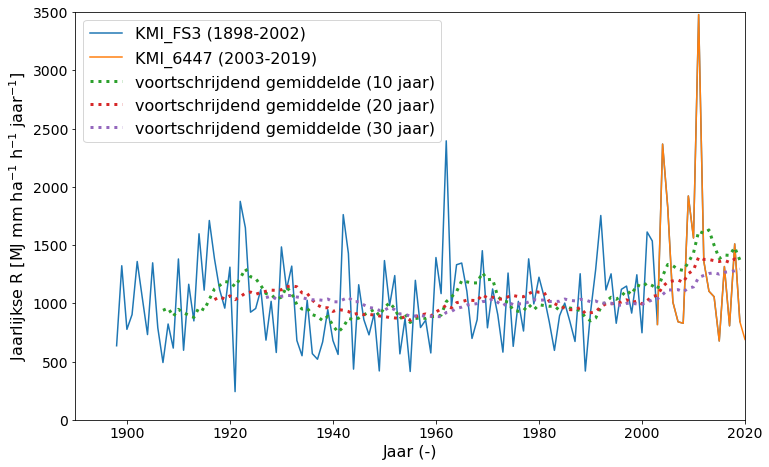

In [30]:
plt.figure(figsize=[12,7.5])

years = range(1898,2020,1)
rfactor_all=get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], years)
rfactor_all=rfactor_all[~(rfactor_all["erosivity_cum"].isnull())].sort_values("year")
plt.plot(rfactor_all["year"],rfactor_all["erosivity_cum"],label="KMI_FS3 (1898-2002)")

years = range(2003,2021,1)
rfactor_30=get_rfactor_station_year(erosivity,["KMI_6447","KMI_FS3"], years)
rfactor_30=rfactor_30[~(rfactor_30["erosivity_cum"].isnull())].sort_values("year")
plt.plot(rfactor_30["year"],rfactor_30["erosivity_cum"],label="KMI_6447 (2003-2019)")

# rolling mean
scales  = [10,20,30]
for scale in scales:
    y = rfactor_all["erosivity_cum"].rolling(scale).mean()
    x = y.index+1898
    plt.plot(x,y,ls=':',lw=3,label=f'voortschrijdend gemiddelde ({scale} jaar)')
plt.ylim([0,3500])
plt.xlim([1890,2020])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel(r'Jaar (-)',fontsize=16)
plt.ylabel(r'Jaarlijkse R [MJ mm ha$^{-1}$ h$^{-1}$ jaar$^{-1}$]',fontsize=16)
plt.legend(prop={'size':16})

**All stations expect Ukkel**

In [76]:
stations_belgium_excl_ukkel = [station for station in stations["station"] if station not in ["KMI_6447","KMI_FS3"]]
years = range(1898,2021,1)
rfactor_non_ukkel = get_rfactor_station_year(erosivity,stations_belgium_excl_ukkel, years)
print(rfactor_non_ukkel["erosivity_cum"].mean())
len(rfactor_non_ukkel["station"].unique())

1245.856437953085


55

**All stations flanders**

In [49]:
stations_flanders = [station for station in stations["station"] if station not in  ["KMI_6447","KMI_FS3","KMI_6455","KMI_6459","KMI_6472","KMI_6494","KMI_6484"]]
years = range(1898,2021,1)
rfactor_flanders = get_rfactor_station_year(erosivity,stations_flanders, years)
print(rfactor_flanders["erosivity_cum"].mean())
len(rfactor_flanders["station"].unique())

1224.7756475820095


52

**Plot the distribution of all R-values for Belgium, excluding the data from Ukkel**

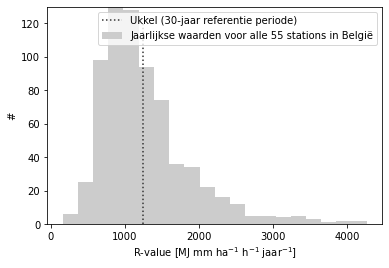

In [52]:
rfactor_non_ukkel = get_rfactor_station_year(erosivity,stations_belgium_excl_ukkel, range(1991, 2021))
plt.hist(rfactor_non_ukkel["erosivity_cum"],20,color=[0.8]*3,label=r"Jaarlijkse waarden voor alle 55 stations in België")
plt.plot([1239,1239],[0,120],color=[0.2]*3,ls=":",label="Ukkel (30-jaar referentie periode)")
plt.ylabel(r"#")
plt.xlabel(r"R-value [MJ mm ha$^{-1}$ h$^{-1}$ jaar$^{-1}$]")
plt.ylim([0,130])
plt.legend()

**All stations of the VMM (Flanders)**

In [64]:
erosivity

,datetime,event_rain_cum,max_30min_intensity,event_energy,erosivity,all_event_rain_cum,erosivity_cum,station,year,tag
0,2004-01-07 12:30:00,7.40,10.60,1.642414,17.409589,0.00,17.409589,KMI_6414,2004,KMI_6414_2004
1,2004-01-08 11:30:00,5.90,4.80,0.977963,4.694222,7.40,22.103810,KMI_6414,2004,KMI_6414_2004
2,2004-01-11 05:40:00,8.10,4.80,1.242868,5.965767,14.50,28.069577,KMI_6414,2004,KMI_6414_2004
3,2004-01-11 19:30:00,7.10,9.60,1.611688,15.472204,22.60,43.541781,KMI_6414,2004,KMI_6414_2004
4,2004-01-12 08:40:00,21.40,9.60,3.684080,35.367172,29.70,78.908954,KMI_6414,2004,KMI_6414_2004
...,...,...,...,...,...,...,...,...,...,...
88702,2020-12-14 18:50:00,6.11,1.42,0.636761,0.904201,584.59,768.813432,P11_043,2020,P11_043_2020
88703,2020-12-21 10:20:00,6.42,2.04,0.737794,1.505099,591.69,770.318531,P11_043,2020,P11_043_2020
88704,2020-12-22 15:30:00,16.38,3.86,2.317770,8.946592,598.11,779.265122,P11_043,2020,P11_043_2020
88705,2020-12-27 08:30:00,7.25,2.64,0.843483,2.226796,614.93,781.491918,P11_043,2020,P11_043_2020


In [74]:
stations_vmm = [station for station in stations["station"] if "KMI" not in station]
rfactor_vmm=get_rfactor_station_year(erosivity)
print(rfactor_vmm["erosivity_cum"].mean())
len(rfactor_vmm["station"].unique())

1217.9256551634023


59

In [72]:
erosivity

,datetime,event_rain_cum,max_30min_intensity,event_energy,erosivity,all_event_rain_cum,erosivity_cum,station,year,tag
0,2004-01-07 12:30:00,7.40,10.60,1.642414,17.409589,0.00,17.409589,KMI_6414,2004,KMI_6414_2004
1,2004-01-08 11:30:00,5.90,4.80,0.977963,4.694222,7.40,22.103810,KMI_6414,2004,KMI_6414_2004
2,2004-01-11 05:40:00,8.10,4.80,1.242868,5.965767,14.50,28.069577,KMI_6414,2004,KMI_6414_2004
3,2004-01-11 19:30:00,7.10,9.60,1.611688,15.472204,22.60,43.541781,KMI_6414,2004,KMI_6414_2004
4,2004-01-12 08:40:00,21.40,9.60,3.684080,35.367172,29.70,78.908954,KMI_6414,2004,KMI_6414_2004
...,...,...,...,...,...,...,...,...,...,...
88702,2020-12-14 18:50:00,6.11,1.42,0.636761,0.904201,584.59,768.813432,P11_043,2020,P11_043_2020
88703,2020-12-21 10:20:00,6.42,2.04,0.737794,1.505099,591.69,770.318531,P11_043,2020,P11_043_2020
88704,2020-12-22 15:30:00,16.38,3.86,2.317770,8.946592,598.11,779.265122,P11_043,2020,P11_043_2020
88705,2020-12-27 08:30:00,7.25,2.64,0.843483,2.226796,614.93,781.491918,P11_043,2020,P11_043_2020


**Compute values per year over all stations**

In [78]:
get_rfactor_station_year(erosivity).groupby("station").aggregate({"erosivity_cum":[np.mean,np.std],"year":lambda x:len(x)}).sort_values(('year', '<lambda>'),ascending=False).reset_index()

station erosivity_cum                  year
                      mean          std <lambda>
0    KMI_FS3   1010.487844   371.933713      105
1   KMI_6459   1340.614056   585.150556       20
2   KMI_6455   1199.599411   580.812478       20
3   KMI_6434   1391.296187   502.190416       18
4   KMI_6472   1280.734201   664.519280       18
5   KMI_6447   1334.170571   715.350257       18
6   KMI_6484   1444.644635   411.653704       17
7   KMI_6414   1349.195569   653.365026       17
8    P11_007   1285.557218   495.830374       16
9    P08_009   1309.460711   786.657351       16
10   P09_016   1275.052232   605.842597       16
11   P03_017   1468.888036   622.680329       16
12   P03_005   1276.131427   417.031147       16
13   P08_018   1301.808581   740.192388       16
14   P02_008   1103.665894   404.545699       16
15   P02_004   1369.939111   913.305528       16
16   P08_013   1183.345530   542.582846       16
17   P01_015   1085.502797   439.564955       16
18   P01_010   1401.340680   550.308817       16
19   P01_003   1414.582263   766.083877       16
20   P07_006   1037.401430   410.592285       16
21   P09_012   1102.130117   441.087028       16
22   P06_014   1052.184538   262.272958       15
23   P10_011   1143.694992   414.207639       15
24   P11_002   1273.769220   719.161298       15
25  KMI_6477   1334.256852   657.716600       15
26   P05_019    855.648645   234.248200       14
27   P07_021   1021.336993   566.074439       14
28   P07_022   1272.129495   413.387285       14
29   P11_024   1447.756128  1059.675621       14
30   P04_020   1151.741448   586.683897       13
31   P04_001   1502.970300   496.840973       13
32  KMI_6439   1164.737044   482.066161       13
33   P08_031   1191.675162   610.926623       12
34   P08_028   1101.437541   730.401906       12
35   P09_025   1139.809843   534.114073       12
36   P09_032   1394.128647   852.103699       12
37   P09_026   1104.083686   556.112801       12
38   P04_027   1206.828490   427.250746       12
39   P06_040   1072.449810   309.485257       12
40   P03_041   1063.729085   363.465835       12
41   P01_029   1324.300956   982.214890       12
42   P05_039   1355.200190   661.914958       12
43   P03_036   1454.514098   844.185002       12
44   P01_037    883.056784   278.447918       12
45   P11_043   1383.886534   870.777180       12
46   P08_033   1422.434887   620.956718       11
47   P09_034   1152.495101   452.546496       11
48   P09_035   1542.423142   769.585954       11
49   P08_023   1026.483047   451.415805       10
50   P10_042   1235.839280   565.280436       10
51   P02_030   1075.272336   321.011857        9
52   P05_038    964.006869   240.677511        9
53  KMI_6418    822.445427   376.444495        8
54  KMI_6494   2370.775575   804.204799        8
55  KMI_6464   1119.381889   584.661685        8
56  KMI_6431   1039.772827   271.284572        6
57   P04__01   1048.389321   643.492388        2
58   P01_001    409.196024          NaN        1

## Analysis (monthly resolution)
Get the EI30-values for 2018 based on two Ukkel station ("KMI_6447","KMI_FS3")  

In [176]:
erosivity_monthly = erosivity["erosivity"].loc[erosivity["station"].isin(["KMI_6447","KMI_FS3"])].resample("M").sum().to_frame()

In [177]:
erosivity_monthly["month"] = erosivity_monthly.index.month

In [178]:
em = erosivity_monthly.groupby("month").aggregate({"erosivity":[np.mean,lambda x:np.percentile(x,25),lambda x:np.percentile(x,75)]})

In [179]:
em["mean"] = em["erosivity"]["mean"]
em["l_e"] = em["erosivity"]["mean"]-em["erosivity"]["<lambda_0>"]
em["u_e"] = em["erosivity"]["<lambda_1>"]-em["erosivity"]["mean"]

In [180]:
em

erosivity                               mean         l_e        u_e
             mean <lambda_0>  <lambda_1>                                   
month                                                                      
1       38.998491  16.920618   53.321229   38.998491   22.077872  14.322738
2       27.184750  10.011984   37.923135   27.184750   17.172766  10.738385
3       33.424260  14.382062   46.598510   33.424260   19.042197  13.174250
4       37.635364  17.213917   45.898283   37.635364   20.421447   8.262919
5       95.620401  29.448805  112.672699   95.620401   66.171595  17.052299
6      130.340140  37.011502  188.917469  130.340140   93.328638  58.577330
7      247.138807  64.483334  328.192346  247.138807  182.655474  81.053538
8      176.487762  58.274647  220.581928  176.487762  118.213115  44.094166
9      104.907262  33.433044  125.748671  104.907262   71.474218  20.841409
10      73.311051  25.118608   84.885135   73.311051   48.192443  11.574084
11      49.177519  21.309740   62.070508   49.177519   27.867779  12.892989
12      43.630242  20.030277   60.830412   43.630242   23.599965  17.200170

**Plot**

Text(0, 0.5, 'R-waarde [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]')

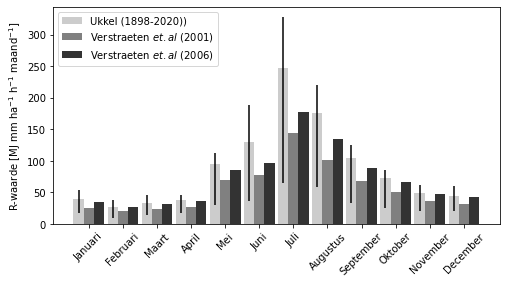

In [181]:
fig = plt.figure(figsize=(8,4))
x = np.arange(len(em))
y_gv = [26,20,24,27,70,77,144,102,68,50,37,32]
y_gv2 = [35,27,32,36,86,96,177,135,89,66,48,43]
plt.bar(x-0.3,em["mean"],yerr=em[["l_e","u_e"]].T.values,color=[0.80]*3,width=0.3,label="Ukkel (1898-2020))")
plt.bar(x,y_gv,width=0.3,color=[0.5]*3,label="Verstraeten $\it{et. al}$ (2001)")
plt.bar(x+0.3,y_gv2,width=0.3,color=[0.2]*3,label="Verstraeten $\it{et. al}$ (2006)")
plt.ylabel("R-value")
ax = fig.axes
plt.xticks(x,["Januari","Februari","Maart","April","Mei","Juni","Juli","Augustus","September","Oktober","November","December"],rotation=45)
plt.legend(loc=2,facecolor ="white")
plt.ylabel(r"R-waarde [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]")

## Appendix B: monthly analysis (detail)
**Evolution monthly R-value**
Generate plot to analyse evolution of montly R over the years

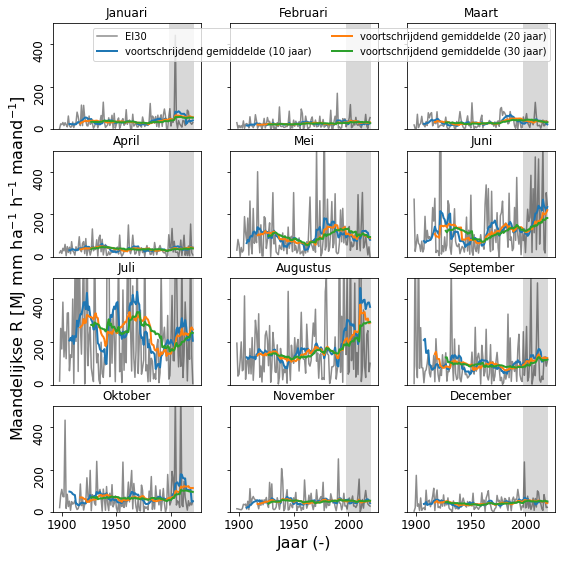

In [184]:
def subplot_montlhy_R(df,ax,ind1,ind2):

    if (ind1==0) & (ind2==2):
        ax.plot(df["year"],df["erosivity"],color=[0.1]*3,alpha=0.5,label="EI30")
    else:
        ax.plot(df["year"],df["erosivity"],color=[0.1]*3,alpha=0.5)
    ax.fill_between([1998,2021], 0,500,facecolor='grey', alpha=0.3)    
    # rolling mean
    scales  = [10,20,30]
    for scale in scales:
        y = df["erosivity"].reset_index().rolling(scale).mean()
        if scale==10:
            y_max=np.nanmax(y.values)*1.1
        x = y.index+1898
        ax.plot(x,y,lw=2,label=f'voortschrijdend gemiddelde ({scale} jaar)')
    if ind1!=3:
        ax.set_xticks([])
    else:
        if ind2==1:
            ax.set_xlabel(r'Jaar (-)',fontsize=16)
    ax.set_ylim([0,500])
    ax.set_title(name)
    ax.tick_params(axis='y', which='major', labelsize=12,rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=12)
    if ind2!=0:
        ax.set_yticklabels([])
    else:
        if ind1==2:
            ax.set_ylabel('\t\t\t Maandelijkse R [MJ mm ha$^{-1}$ h$^{-1}$ maand$^{-1}$]',fontsize=16)
    if (ind1==0) & (ind2==2):
        ax.legend(ncol=2)
        
fig,ax = plt.subplots(4,3,figsize=[9,9])
months = ["Januari","Februari","Maart","April","Mei","Juni","Juli","Augustus","September","Oktober","November","December"]
erosivity_monthly["year"] = erosivity_monthly.index.year

for month,name in enumerate(months):
    ind1=int(np.floor((month)/3))
    ind2=np.mod(month,3)
    df_plot = erosivity_monthly.loc[erosivity_monthly["month"]==month+1]
    df_plot  = df_plot [~np.isnan(df_plot["erosivity"])].sort_values("year")
    subplot_montlhy_R(df_plot,ax[ind1,ind2],ind1,ind2)

